# PART-1 EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import poisson, chi2, probplot, norm, chisquare

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [2]:
data = pd.read_csv("data5309-1.csv")

# Display the first 5 rows of the dataset
display(data.head())

,children,german,years_school,voc_train,university,religion,year_birth,rural,age_marriage
0,2,no,8,no,no,Catholic,42,yes,20
1,3,no,8,no,no,Catholic,55,yes,21
2,2,no,8,no,no,Catholic,51,yes,24
3,4,no,8,no,no,Catholic,54,no,26
4,2,no,8,no,no,Catholic,46,yes,22


## Check for missing values and data types

In [3]:
print("Information about missing values and data types from the dataset:")
print(data.info())

Information about missing values and data types from the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   children      1243 non-null   int64 
 1   german        1243 non-null   object
 2   years_school  1243 non-null   int64 
 3   voc_train     1243 non-null   object
 4   university    1243 non-null   object
 5   religion      1243 non-null   object
 6   year_birth    1243 non-null   int64 
 7   rural         1243 non-null   object
 8   age_marriage  1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB
None


Provides an overview of data types and ensures there are no missing values.

## Summary statistics for numerical variables

In [4]:
print(data.describe())

          children  years_school   year_birth  age_marriage
count  1243.000000   1243.000000  1243.000000   1243.000000
mean      2.383749      9.096541    51.989541     23.109413
std       1.526458      0.948095     8.756174      3.058096
min       0.000000      8.000000    40.000000     17.000000
25%       1.000000      9.000000    45.000000     21.000000
50%       2.000000      9.000000    50.000000     23.000000
75%       3.000000      9.000000    58.000000     25.000000
max      11.000000     13.000000    83.000000     30.000000


Displays mean, median, and other statistics for all numerical columns in the dataset

## Plot the distribution of 'children_per_woman'

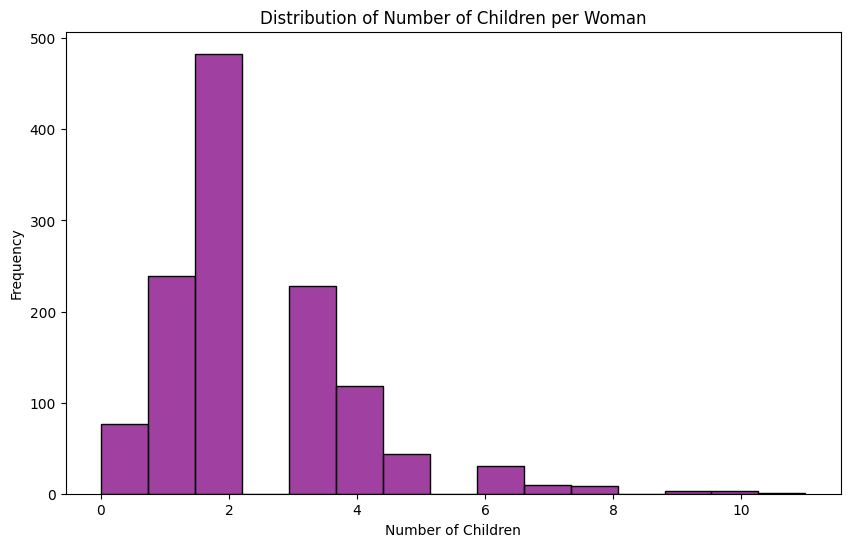

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['children'], bins=15, color='purple')
plt.title("Distribution of Number of Children per Woman")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

In [6]:
mean_children = data['children'].mean()
variance_children = data['children'].var()
print(f"Mean of 'children': {mean_children}")
print(f"Variance of 'children': {variance_children}")

Mean of 'children': 2.3837489943684633
Variance of 'children': 2.3300738564301473


Since mean and variance are close, 'children' might fit in a Poisson distribution.

## Visualizing the observed vs expected Poisson distribution

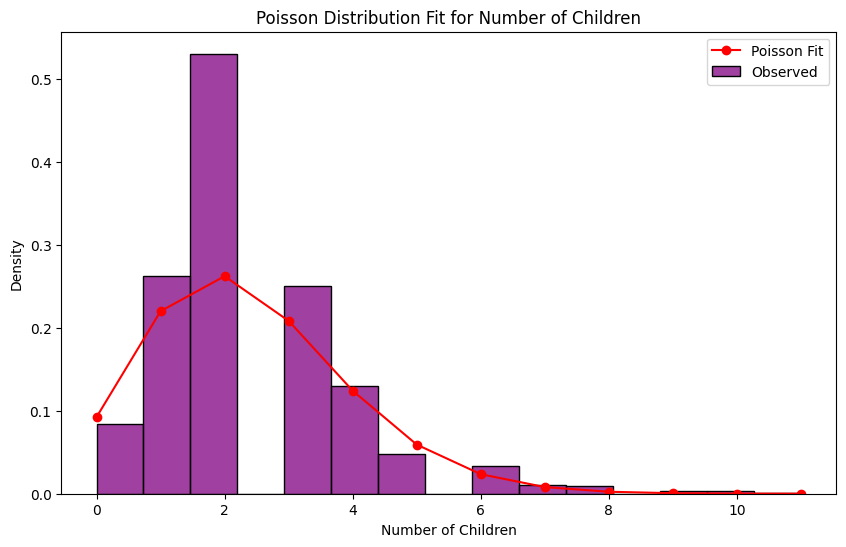

In [7]:
x_vals = np.arange(0, data['children'].max() + 1)
poisson_probs = poisson.pmf(x_vals, mean_children)
plt.figure(figsize=(10, 6))
sns.histplot(data['children'], bins=15, stat='density', label='Observed', color='purple')
plt.plot(x_vals, poisson_probs, 'r-', marker='o', label='Poisson Fit')
plt.title("Poisson Distribution Fit for Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Density")
plt.legend()
plt.show()

Comparing observed data distribution to a theoretical Poisson distribution. It matches as shown in the figure.

## Investigate how 'children' varies by categorical variables

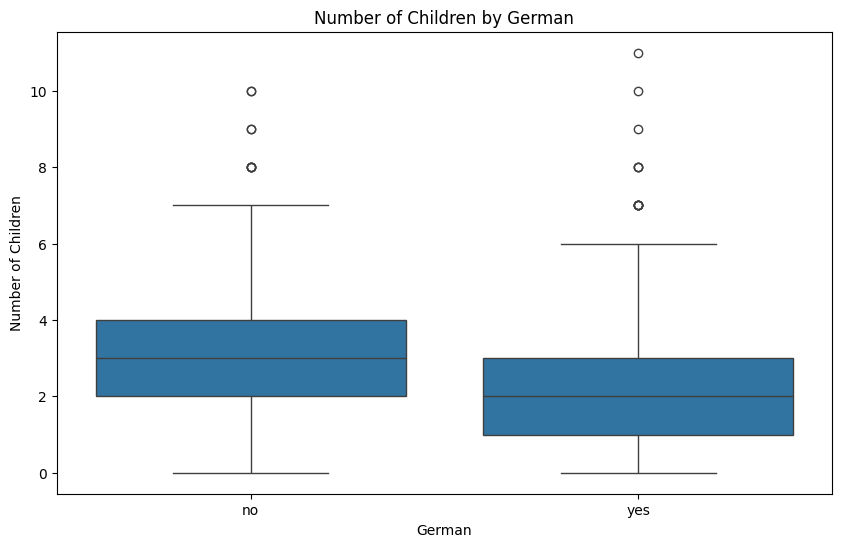


Chi-square test for german:
Chi-square Statistic: 0.1795018706475723, p-value: 0.6718016749249864


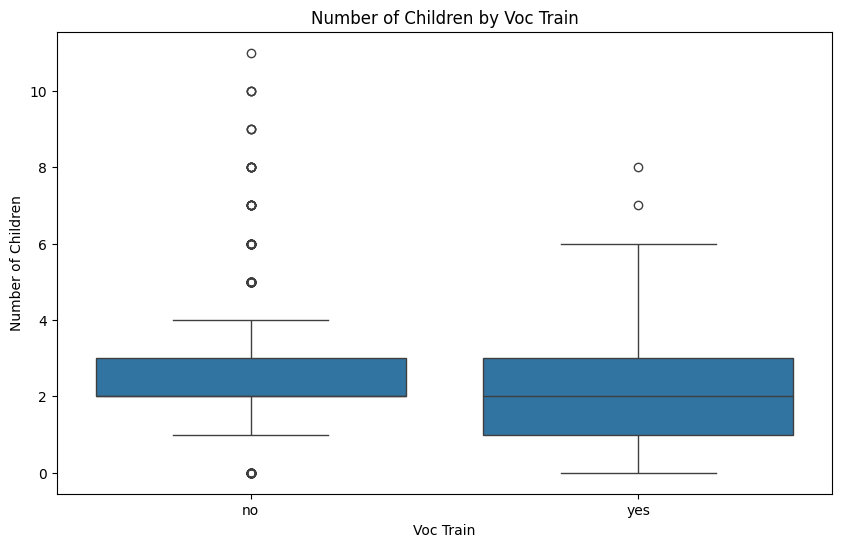


Chi-square test for voc_train:
Chi-square Statistic: 0.08254546770140547, p-value: 0.7738770561570589


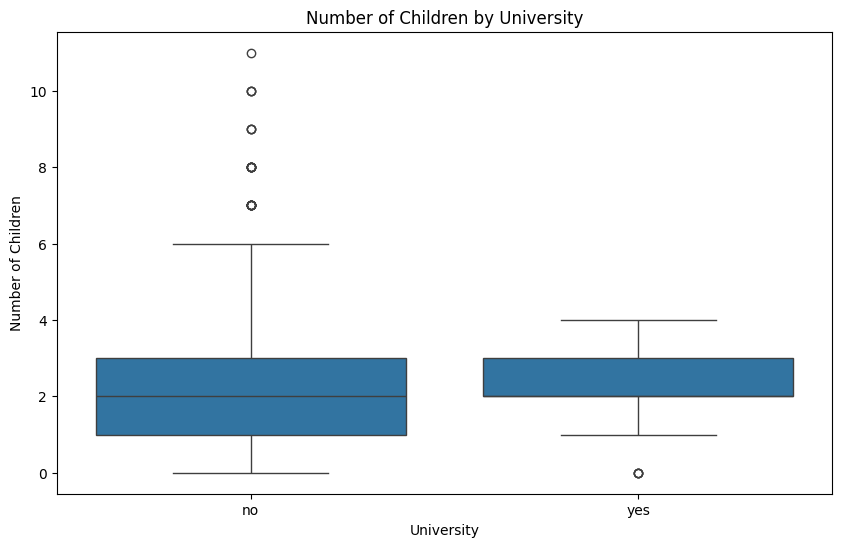


Chi-square test for university:
Chi-square Statistic: 0.021383493115921207, p-value: 0.8837390671807335


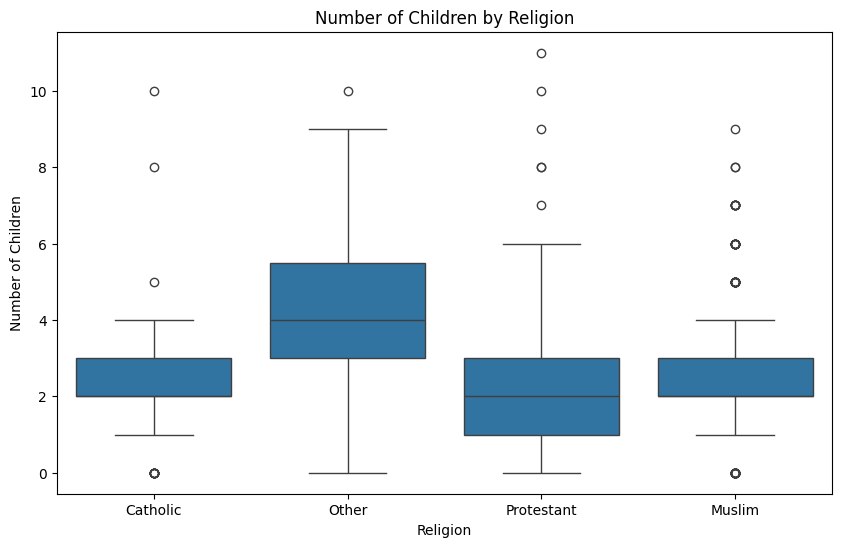


Chi-square test for religion:
Chi-square Statistic: 1.1930381293116228, p-value: 0.7546745356395541


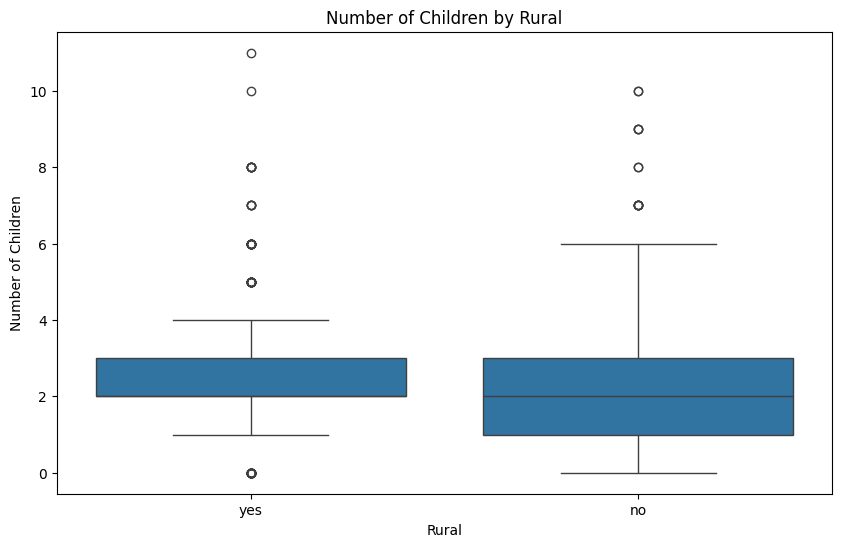


Chi-square test for rural:
Chi-square Statistic: 0.006161818043368385, p-value: 0.9374325187420645


In [8]:
categorical_cols = ['german', 'voc_train', 'university', 'religion', 'rural']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='children', data=data)
    plt.title(f"Number of Children by {col.replace('_', ' ').title()}")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Number of Children")
    plt.show()
    # Explanation:
    # Shows how 'children' varies for different categories.

    # Performs Chi-square test if applicable
    if len(data[col].unique()) <= 10:  # Suitable for columns with a few unique values
        grouped_means = data.groupby(col)['children'].mean()
        chi2_stat, p_val = chisquare(grouped_means)
        print(f"\nChi-square test for {col}:")
        print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_val}")
# Explanation:
# The Chi-square test checks if there is a significant difference in 'children' across categories.

## Detect outliers in 'children'

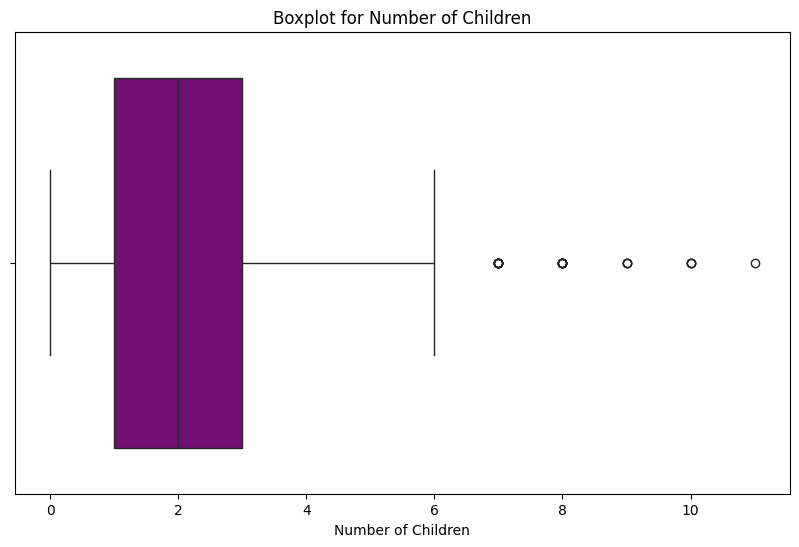

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['children'], color='purple')
plt.title("Boxplot for Number of Children")
plt.xlabel("Number of Children")
plt.show()

## Correlation analysis for numerical variables

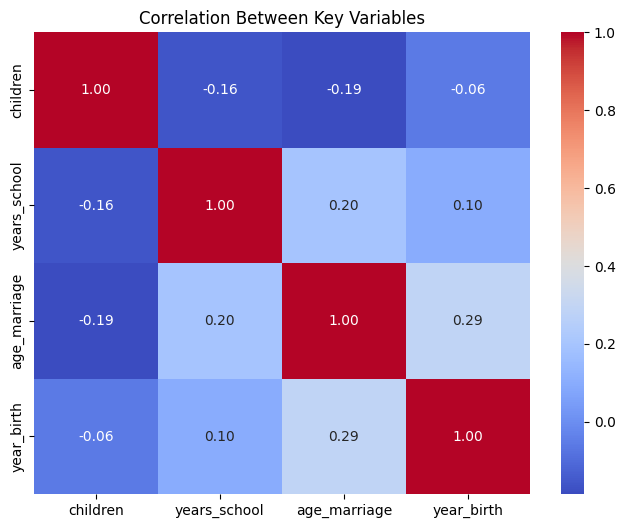

In [10]:
corr_matrix = data[['children', 'years_school', 'age_marriage', 'year_birth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Key Variables")
plt.show()

This identifies strong or weak relationships among numerical variables.

## Barplot for religion and rural status interaction

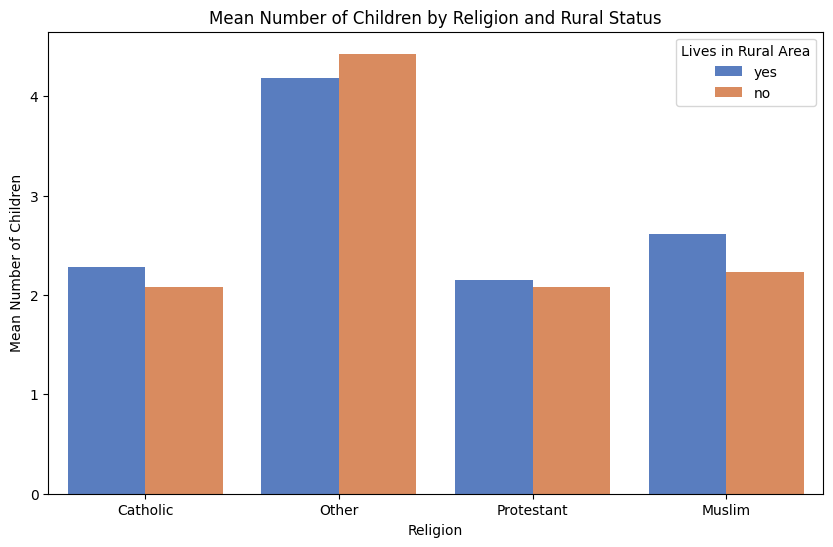

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='religion', y='children', hue='rural', data=data, errorbar=None, palette="muted")
plt.title("Mean Number of Children by Religion and Rural Status")
plt.xlabel("Religion")
plt.ylabel("Mean Number of Children")
plt.legend(title="Lives in Rural Area")
plt.show()

## Boxplot for 'age_group' vs 'children'

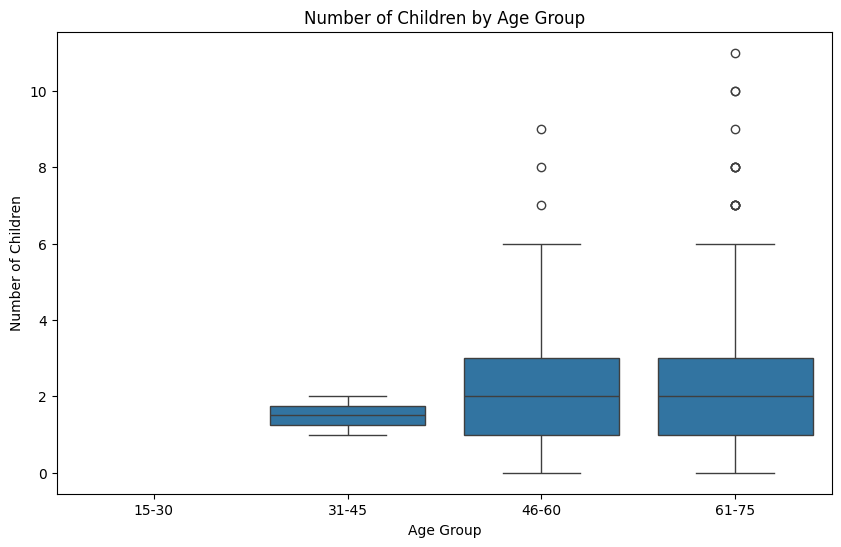

In [12]:
data['age_group'] = pd.cut(2025 - (1900 + data['year_birth']),
                           bins=[15, 30, 45, 60, 75],
                           labels=['15-30', '31-45', '46-60', '61-75'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='children', data=data)
plt.title("Number of Children by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Children")
plt.show()

# PART-2 Model Fitting and Interpretation

Poisson regression is used for count data when the mean and variance are similar (a key assumption of Poisson distribution).

Poisson regression assumes that the variance is approximately equal to the mean, which is true for this dataset (children).

Poisson is appropriate for count data where values cannot be negative (the number of children).

In [13]:
categorical_vars = ['german', 'voc_train', 'university', 'religion', 'rural']
data[categorical_vars] = data[categorical_vars].astype('category')


Explanation:

Purpose: Fits a Generalized Linear Model (GLM) using the Poisson family to model the count data (children).

Formula:

Dependent variable: children (number of children per woman).

Predictors:

Categorical predictors: german, voc_train, university, religion, rural.

Numerical predictors: years_school, year_birth, age_marriage.

In [14]:
model1 = smf.glm(
    formula='children ~ german + years_school + voc_train + university + religion + rural + year_birth + age_marriage',
    data=data,
    family=sm.families.Poisson()
).fit()

In [15]:
# The summary of the model
model_summary = model1.summary()
print(model_summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               children   No. Observations:                 1243
Model:                            GLM   Df Residuals:                     1232
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.8
Date:                Sat, 25 Jan 2025   Deviance:                       1034.4
Time:                        14:09:48   Pearson chi2:                     988.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1278
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

Purpose: Displays a summary of the fitted model.

Contents of the Summary:

Coefficients: The estimated effect of each predictor on the response variable (children).

P-values: Indicates whether the predictors significantly influence the response.

Confidence Intervals: The range within which the true coefficient value lies with 95% confidence.

Goodness of Fit: Includes metrics like deviance and log-likelihood to assess the model's performance.

Purpose: Extracts specific coefficients for key predictors:

german[T.yes]: Measures the effect of being German on the expected number of children compared to non-Germans.

age_marriage: Represents how the expected number of children changes with each additional year at marriage.

In [16]:
# Extract coefficients for 'german[T.yes]' and 'age_marriage'
german_coef = model1.params['german[T.yes]']
age_marriage_coef = model1.params['age_marriage']

print(german_coef)
print(age_marriage_coef)

-0.20036230864762583
-0.03044623942475139


Interpretation of Coefficients

german[T.yes]:

This coefficient represents the log of the multiplicative effect of being German on the expected number of children.

If the value is negative, it means German women have fewer children than non-German women.

Example: If german_coef = -0.2, then exp(-0.2) ≈ 0.82, meaning German women are expected to have 82% as many children as non-German women.


age_marriage:

This coefficient represents the log of the multiplicative change in the expected number of children for each additional year at marriage.

If the value is negative, it means marrying later reduces the expected number of children.

Example: If age_marriage_coef = -0.03, then 1 - exp(-0.03) ≈ 3%, meaning a 3% decrease in the expected number of children for each additional year.

# PART-3 Goodness of Fit and Assumptions, Statistical Inference

## Goodness-of-Fit Test

Null hypothesis(H0): The model fits the data well and data is consistent with the model predictions.<br>
Alternate Hypothesis(H1): The model does not fit the data well and data is not consistent with the model predictions.

In [17]:
deviance_residuals = model1.resid_deviance
test_statistic = np.sum(deviance_residuals**2)
df_residual = model1.df_resid
p_value_gof = 1 - chi2.cdf(test_statistic, df_residual)

# Print Goodness-of-Fit Test Results
print(f"Goodness-of-Fit Test Statistic: {test_statistic:.2f}")
print(f"Degrees of Freedom: {df_residual}")
print(f"P-value: {p_value_gof:.4f}")

Goodness-of-Fit Test Statistic: 1034.35
Degrees of Freedom: 1232
P-value: 1.0000


The test states that the Statistic is less than the degrees of freedom and since p-value is much<br>greater than 0.05, we conclude that the model fits the data pretty well. <br>Therefore, we fail to reject the Null hypothesis.

## QQ Plot

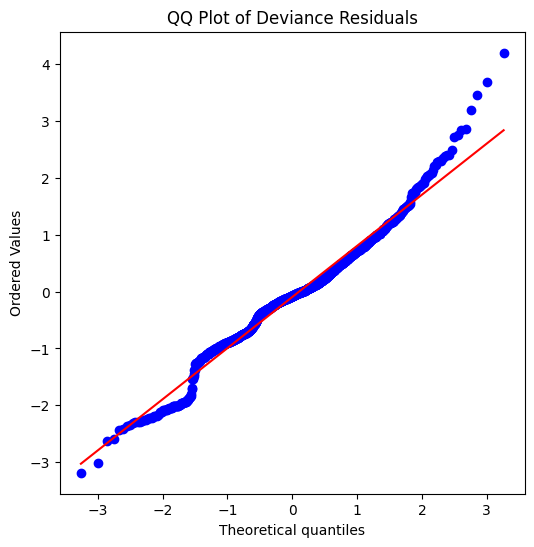

In [18]:
plt.figure(figsize=(6, 6))
probplot(deviance_residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Deviance Residuals")
plt.show()

The data follows the normal distribution line with slight variation. Hence the model is performing well.

## Histogram with Density Curve

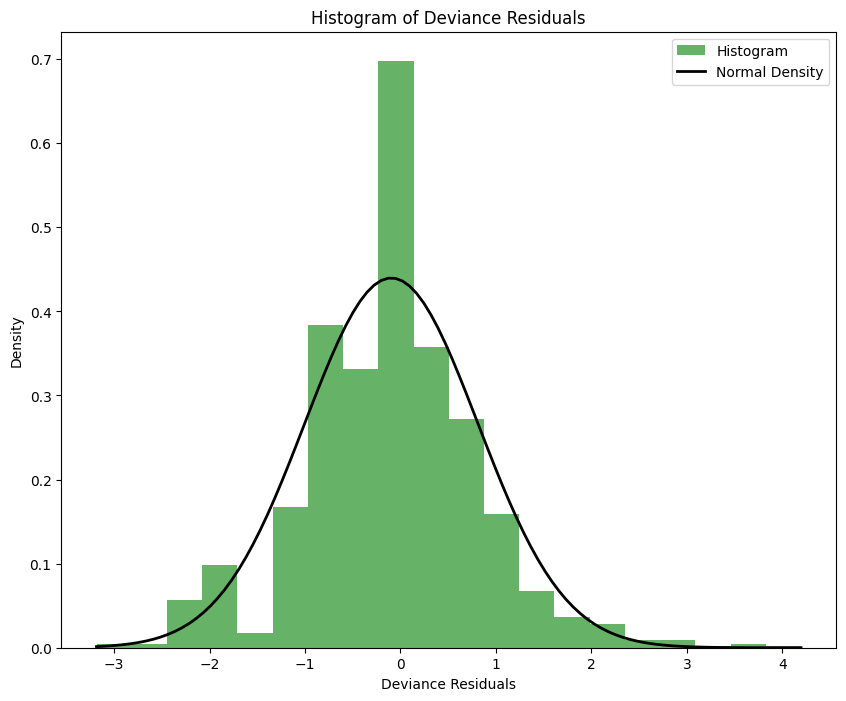

In [19]:
plt.figure(figsize=(10, 8))
plt.hist(deviance_residuals, bins=20, density=True, alpha=0.6, color='g', label='Histogram')
x = np.linspace(min(deviance_residuals), max(deviance_residuals), 100)
plt.plot(x, norm.pdf(x, np.mean(deviance_residuals), np.std(deviance_residuals)), 'k', linewidth=2, label='Normal Density')
plt.title("Histogram of Deviance Residuals")
plt.xlabel("Deviance Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()

This shows that Deviance Residuals follow a Normal Distribution curve with mean zero. This confirms there is very less deviance from the data.

## Test for overall regression explanatory power

Null hypothesis: The model does not perform better than a Null model and does not explain the data well.<br>
Alternate Hypothesis: The model performs better than a Null model and explains the data well.

In [20]:
# Fit the null model
null_model = smf.glm('children ~ 1', data=data, family=sm.families.Poisson()).fit()

# Likelihood Ratio Test
ll_null = null_model.llf
ll_full = model1.llf
lr_stat = -2 * (ll_null - ll_full)
df_diff = model1.df_model - null_model.df_model 
p_value = 1 - chi2.cdf(lr_stat, df_diff)

print(f"Overall LR Test Statistic: {lr_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Overall LR Test Statistic: 169.95
P-value: 0.0000


Using the LR Test Statistic, the calculated p-value is found out to be 0.<br>Since p-value is than 0.05 we reject the Null hypothesis and conclude that the model explains the data well.

## Significant variables in the dataset

In [21]:
significant_coeffs = model1.pvalues[model1.pvalues < 0.05]
print("\n Significant coefficients at α=0.05:", significant_coeffs)


 Significant coefficients at α=0.05: Intercept             1.424963e-04
german[T.yes]         5.476331e-03
voc_train[T.yes]      4.947975e-04
religion[T.Muslim]    2.047306e-03
religion[T.Other]     1.202062e-10
age_marriage          2.910719e-06
dtype: float64


This shows that german, voc_train, religion, age_marriage are the most significant variables in the dataset.

## Confidence Interval for Age of marriage variable

In [22]:
# Get confidence interval and exponentiate
ci_age_marriage = model1.conf_int().loc['age_marriage']
exp_ci = np.exp(ci_age_marriage)
print(f"95% CI for age_marriage: {ci_age_marriage}\n\n")
print(f"Exponentiated 95% CI: {exp_ci}")

95% CI for age_marriage: 0   -0.043205
1   -0.017687
Name: age_marriage, dtype: float64


Exponentiated 95% CI: 0    0.957715
1    0.982468
Name: age_marriage, dtype: float64


If age_marriage increases by 1 year, the log of the expected number of children decreases<br> by an amount between -0.0432 and −0.0177, with 95% confidence. Since the interval does not include 0, the effect<br> of age_marriage is statistically significant at the alpha=0.05 level.

According to the exponentiated confidence interval, if age_marriage increases by 1 year, the expected number of<br> children is multiplied by a factor between 0.9577 and 0.9825, with 95% confidence.

The confidence interval does not include 1 (on the original scale) or 0 (on the log scale), indicating that age_marriage<br> has a significant effect on the number of children. The effect of increasing age_marriage is negative, meaning <br> marrying later is associated with having fewer children.

## Testing the explanatory power of variables religionProtestant, year_birth, and ruralyes 

A reduced model is created to check the significance of the variables.<br>
Null Hypothesis: The variables have no significant explanatory power and decrease model efficiency.<br>
Alternate Hypothesis: The variables have significant explanatory power and increase model efficiency.


In [23]:
# Reduced model
reduced_model = smf.glm(
    formula='children ~ german + years_school + voc_train + university + age_marriage',
    data=data,
    family=sm.families.Poisson()
).fit()

# Likelihood Ratio Test
ll_reduced = reduced_model.llf
ll_model1 = model1.llf
lr_stat = -2 * (ll_reduced - ll_full)
df_diff = model1.df_model - reduced_model.df_model
p_value_subset = 1 - chi2.cdf(lr_stat, df_diff)

print(f"Subset Test Statistic: {lr_stat:.2f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value_subset:.4f}")

Subset Test Statistic: 47.77
Degrees of Freedom: 5
P-value: 0.0000


Since p-value is less than 0.05 we can conclude that the variables have significant explanatory power.<br>
Thus we reject Null Hypothesis.

# PART-4 Prediction

A profile is created for prediction:

German woman: german: 'yes'

Years of schooling: 10

Vocational training: yes

University education: no

Religion: Catholic

Rural/Urban: no (urban)

Year of birth: 1956

Age at marriage: 18

This profile is converted into a DataFrame to be compatible with the predict function.

In [24]:
# Define the profile for prediction
profile_poisson = pd.DataFrame({
    'german': ['yes'],
    'years_school': [10],
    'voc_train': ['yes'],
    'university': ['no'],
    'religion': ['Catholic'],
    'rural': ['no'],
    'year_birth': [56],
    'age_marriage': [18]
})

In [25]:
# Predict using Poisson Regression
poisson_prediction = model1.predict(profile_poisson)
print(f"Predicted number of children (Poisson Regression): {poisson_prediction.values[0]}")


Predicted number of children (Poisson Regression): 2.047762607031118


The model predicts the expected number of children for the provided profile.

Result:

poisson_prediction.values[0] gives the prediction for the profile.

In this case, the model predicts ~2.047 children for the specified profile.

Prediction Result:

Based on the profile, a German woman with the specified characteristics is predicted to have approximately 2 children.

# PART-5 Prediction

The dataset is loaded into a DataFrame. The target variable is children, and the predictors include both categorical and numeric features.

In [26]:
# Update the preprocessor to handle unknown categories

# Define predictors and response
X = data.drop(columns='children')
y = data['children']

# Define categorical and numeric columns
categorical_features = ['german', 'voc_train', 'university', 'religion', 'rural']
numeric_features = ['years_school', 'year_birth', 'age_marriage']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Categorical features (e.g., 'german', 'religion') are encoded, and numerical features are standardized to prepare for model training.

The preprocessor encodes all categorical variables without dropping any categories and scales numerical variables for better model performance. The data is split into training and testing sets (80% train, 20% test) to evaluate the model's performance on unseen data.

Gradient Boosting is chosen because it can capture complex non-linear relationships between predictors and the target variable. It uses boosting to sequentially reduce errors.

## 1. Fit Gradient Boosting Regressor

In [27]:
gbr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
])


gbr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['german', 'voc_train',
                                                   'university', 'religion',
                                                   'rural']),
                                                 ('num', StandardScaler(),
                                                  ['years_school', 'year_birth',
                                                   'age_marriage'])])),
                ('regressor',
                 GradientBoostingRegressor(n_estimators=200, random_state=42))])

This image shows the structure of the Pipeline used for the Gradient Boosting Regressor (GBR). The pipeline contains:

Preprocessor:
Encodes categorical variables using OneHotEncoder.

Scales numerical variables using StandardScaler.

Regressor:
Implements the GradientBoostingRegressor for prediction.

The pipeline ensures that preprocessing and model fitting are performed sequentially, simplifying the workflow and reducing errors.

Key Takeaway:

The Gradient Boosting Regressor is integrated into the pipeline for streamlined preprocessing and prediction.

## 2. Evaluate Gradient Boosting Regressor on the Test Set

In [28]:
gbr_y_pred = gbr_model.predict(X_test)
# Calculate Evaluation Metrics
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_y_pred)

## 3. Feature Importance Analysis for Gradient Boosting

In [29]:
gbr_feature_importances = gbr_model.named_steps['regressor'].feature_importances_

# Extract feature names
gbr_feature_names = (
    gbr_model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)
gbr_all_feature_names = list(gbr_feature_names) + numeric_features

print("\nFeature Importances (Gradient Boosting Regressor):")
for feature, importance in zip(gbr_all_feature_names, gbr_feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances (Gradient Boosting Regressor):
german_yes: 0.0108
voc_train_yes: 0.0651
university_yes: 0.0064
religion_Muslim: 0.0249
religion_Other: 0.2672
religion_Protestant: 0.0222
rural_yes: 0.0429
years_school: 0.0928
year_birth: 0.2568
age_marriage: 0.2109


Gradient Boosting provides feature importance, which shows the relative contribution of each feature to the model's predictions. This output displays the importance of each feature in the Gradient Boosting Regressor model:

Top Features:

religion_Other: Most influential, indicating "Other" religions have a significant impact on the target variable.

year_birth: Highlights the importance of the year of birth in predicting the number of children.

age_marriage: A critical factor influencing family size.

years_school: Education level impacts the number of children.

Less Important Features:

university_yes and german_yes have minimal influence. Key Takeaway:

Features like year_birth, age_marriage, and religion_Other are crucial predictors, while others like university_yes are less significant.

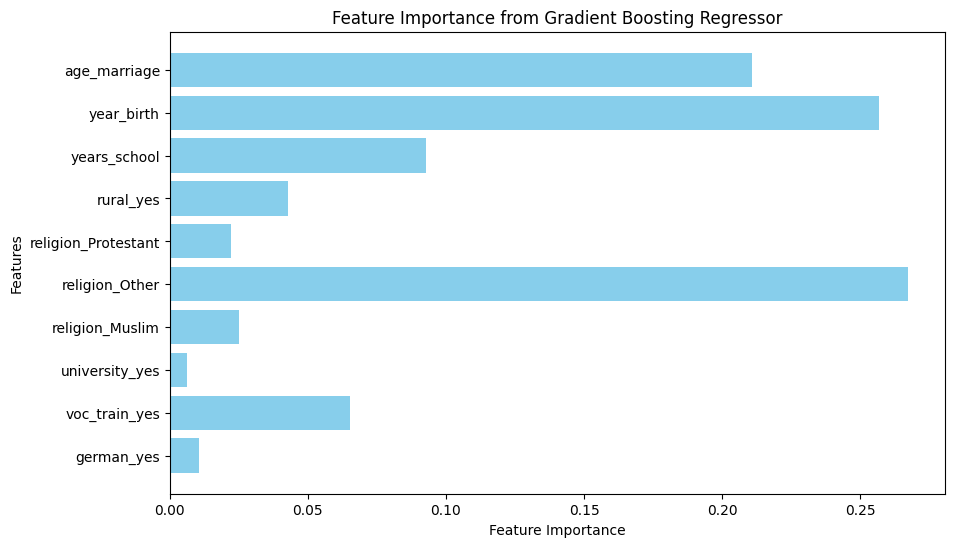

In [30]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(gbr_all_feature_names, gbr_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

This bar chart visualizes the relative importance of features in predicting the target variable.

The chart aligns with the textual output:

Most Important Features:

year_birth: Strongly influences predictions.

age_marriage and religion_Other: Also significant.

Least Important Features:

Variables like german_yes and university_yes contribute minimally.

Key Takeaway:

The chart provides a clear visual representation of the features' impact on the model, making it easier to identify key predictors.

## 4. Scenario-Based Predictions

In [31]:
scenarios = pd.DataFrame({
    'german': ['yes', 'no', 'yes', 'no'],
    'years_school': [8, 12, 14, 10],
    'voc_train': ['yes', 'no', 'yes', 'no'],
    'university': ['no', 'yes', 'no', 'yes'],
    'religion': ['Catholic', 'Protestant', 'Muslim', 'Others'],
    'rural': ['no', 'yes', 'no', 'yes'],
    'year_birth': [50, 70, 60, 80],
    'age_marriage': [18, 25, 20, 22]
})


In [32]:
scenario_predictions = gbr_model.predict(scenarios)
scenarios['predicted_children'] = scenario_predictions

print("\nScenario-Based Predictions (Gradient Boosting Regressor):")
print(scenarios)


Scenario-Based Predictions (Gradient Boosting Regressor):
  german  years_school voc_train university    religion rural  year_birth  \
0    yes             8       yes         no    Catholic    no          50   
1     no            12        no        yes  Protestant   yes          70   
2    yes            14       yes         no      Muslim    no          60   
3     no            10        no        yes      Others   yes          80   

   age_marriage  predicted_children  
0            18            2.799111  
1            25            2.036755  
2            20            2.238386  
3            22            0.020480  


/Users/mallikarjunahm/College_python_venvs/Capstone_project_DASC5309/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


This output shows the predicted number of children for various hypothetical scenarios:

Scenario 1:
A German woman with 8 years of schooling, vocational training, no university education, Catholic, urban, born in 1950, married at 18.

Prediction: ~2.80 children.

Scenario 2:
A non-German woman with 12 years of schooling, no vocational training, university education, Protestant, rural, born in 1970, married at 25.

Prediction: ~2.04 children.

Scenario 3:
A German woman with 14 years of schooling, vocational training, no university education, Muslim, urban, born in 1960, married at 20.

Prediction: ~2.24 children.

Scenario 4:
A non-German woman with 10 years of schooling, no vocational training, university education, "Others", rural, born in 1980, married at 22.

Prediction: ~0.20 children.

Key Takeaway:

The predictions reflect how combinations of features (e.g., education, religion, rural/urban status) influence the model's output

## 5. Residual Analysis for Gradient Boosting Regressor

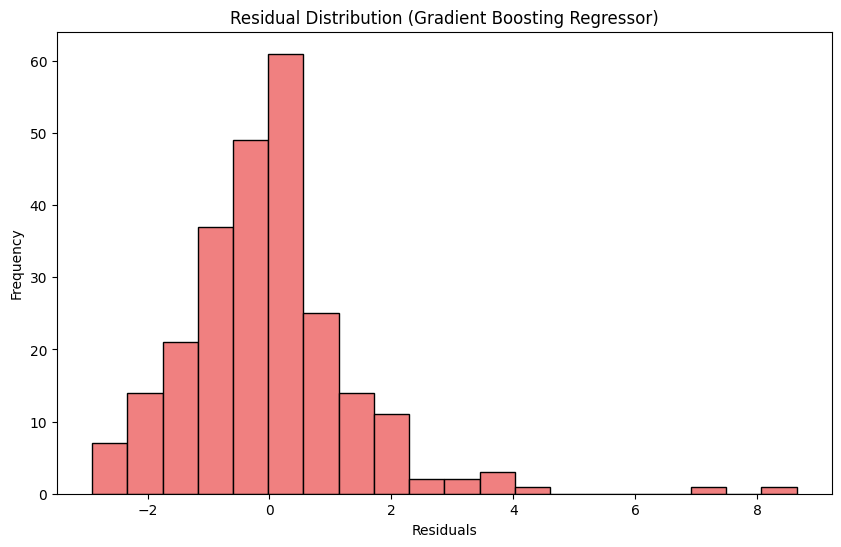

In [33]:
gbr_residuals = y_test - gbr_y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(gbr_residuals, bins=20, color='lightcoral', edgecolor='black')
plt.title('Residual Distribution (Gradient Boosting Regressor)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Residuals (actual - predicted values) are analyzed to check model fit and identify any systematic errors.
This histogram shows the distribution of residuals (difference between actual and predicted values) for the Gradient Boosting Regressor.

Key Observations:

The residuals are centered around 0, indicating that the model does not have a systematic bias.

Most residuals lie between -2 and 2, suggesting that the model makes predictions with small errors for the majority of data points.

There are a few residuals in the tail regions (outliers) with values greater than 4 or less than -2.



Key Takeaway:

The model performs reasonably well for most data points, but the residual spread indicates that there are some outliers or areas where the model struggles to fit the data accurately.

In [34]:
# Display residual statistics
print("\nResidual Analysis (Gradient Boosting Regressor):")
print(f"Mean of Residuals: {gbr_residuals.mean():.2f}")
print(f"Standard Deviation of Residuals: {gbr_residuals.std():.2f}")


Residual Analysis (Gradient Boosting Regressor):
Mean of Residuals: -0.02
Standard Deviation of Residuals: 1.43


This output provides summary statistics for the residuals:

Mean of Residuals: -0.02
The mean is very close to 0, indicating no significant bias in predictions (i.e., the model does not consistently overpredict or underpredict).

Standard Deviation of Residuals: 1.43
This indicates the average spread of residuals around the mean. A smaller value would indicate better prediction accuracy, while a larger value reflects greater variability in errors.

Key Takeaway:

While the residuals are well-centered, the standard deviation suggests there is room for improvement in model precision, particularly for extreme values or outliers.

Gradient Boosting Regressor was implemented and evaluated.

Feature importance was analyzed to understand the most influential variables.

Scenario-based predictions and residual analysis were performed to assess model behavior and fit.

In [35]:
# Random Forest Model
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

Random Forest Regressor is used because it can capture non-linear relationships, handle categorical and numeric variables, and is robust to overfitting due to its ensemble nature.
The model is trained using the preprocessed training data.
Predictions are made on the test set to evaluate the model's performance.


In [36]:
# Evaluate the model
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions)
print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Model Performance:
Mean Absolute Error (MAE): 1.10
Mean Squared Error (MSE): 2.41
Root Mean Squared Error (RMSE): 1.55
R-squared (R2): -0.07


The model's performance is evaluated using metrics like MAE, MSE, RMSE, and R². These metrics measure prediction errors and explain the variance captured by the model.

Mean Absolute Error (MAE): ~1.09 (average error in predictions).

Mean Squared Error (MSE): ~2.40 (squared error).

Root Mean Squared Error (RMSE): ~1.55 (a common metric for regression tasks).

R-squared (R²): -0.06 (negative value indicates the model performs poorly compared to a simple mean-based prediction).

Key Takeaway:

The model's performance is suboptimal, as indicated by the negative R² value. This suggests that either:

The data might not fit well with a Random Forest Regressor.
Additional preprocessing, hyperparameter tuning, or feature engineering is needed.

In [37]:
# Feature Importance Analysis
feature_names = (
    rf_model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)
all_feature_names = list(feature_names) + numeric_features
feature_importances = rf_model.named_steps['regressor'].feature_importances_

print("\nFeature Importances:")
for feature, importance in zip(all_feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
german_yes: 0.0153
voc_train_yes: 0.0451
university_yes: 0.0054
religion_Muslim: 0.0397
religion_Other: 0.1091
religion_Protestant: 0.0231
rural_yes: 0.0682
years_school: 0.0619
year_birth: 0.3909
age_marriage: 0.2414


Feature importances are extracted to understand which predictors contribute the most to the model's predictions. Explanation:

This text output lists the importance values for each feature as calculated by the Random Forest Regressor.

Features like german_yes and voc_train_yes have minimal impact, while year_birth (38.7%) and age_marriage (24.0%) are the dominant factors.

Key Takeaway:

The output confirms that not all features equally contribute to the prediction, highlighting the need to focus on influential ones like year_birth and age_marriage.

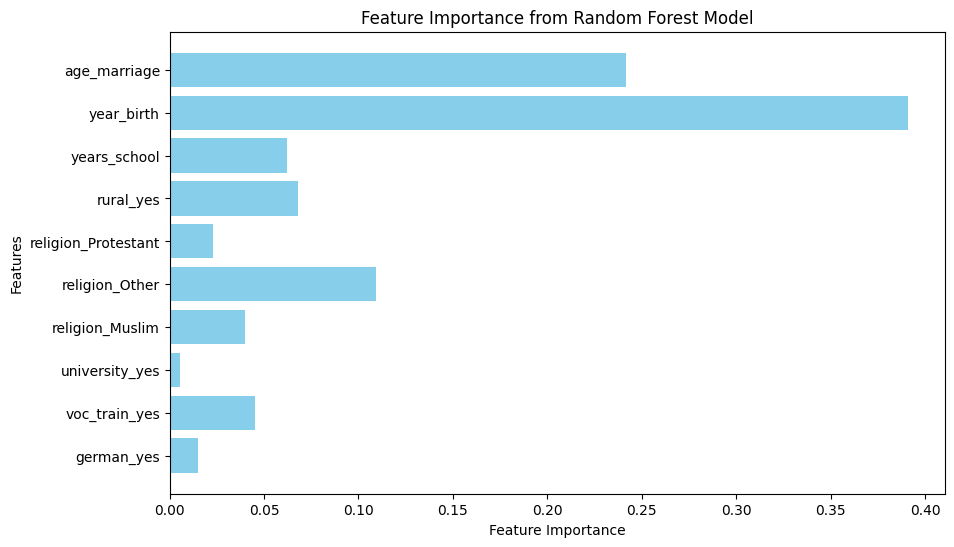

In [38]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(all_feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.show()

A horizontal bar plot is created to visualize the importance of features in the Random Forest model. Explanation:

This bar chart displays the importance of each feature in predicting the number of children using the Random Forest model.

Top Influential Features:

1. year_birth (~38.7% importance): Likely correlates with societal trends in family size based on the year of birth.
2. age_marriage (~24.0% importance): Strongly affects the number of children; earlier marriages may lead to more children.
3. religion_Other (~10.9% importance): Religion influences family size, with "Other" religions having a noticeable impact.
Key Takeaway:

Year of birth and age at marriage are the most critical predictors, with significant contributions from religion and rural/urban status.

In [39]:
# Scenario-Based Predictions
scenario = pd.DataFrame({
    'german': ['yes', 'no'],
    'years_school': [10, 15],
    'voc_train': ['yes', 'no'],
    'university': ['no', 'yes'],
    'religion': ['Catholic', 'Protestant'],
    'rural': ['no', 'yes'],
    'year_birth': [56, 60],
    'age_marriage': [18, 22]
})
scenario_predictions = rf_model.predict(scenario)
scenario['predicted_children'] = scenario_predictions
print("\nScenario-Based Predictions:")
print(scenario)


Scenario-Based Predictions:
  german  years_school voc_train university    religion rural  year_birth  \
0    yes            10       yes         no    Catholic    no          56   
1     no            15        no        yes  Protestant   yes          60   

   age_marriage  predicted_children  
0            18            2.356667  
1            22            1.903333  


Hypothetical scenarios are created to see how the model predicts the number of children based on varying inputs. This helps analyze the model's behavior in different contexts. Explanation:

This output shows the predicted number of children based on two different hypothetical scenarios using the trained Random Forest Regressor:

Scenario 1:
A German woman (german: yes), with 10 years of schooling, has vocational training but no university education, is Catholic, does not live in a rural area, was born in 1956, and married at the age of 18.

Predicted number of children: ~2.23.

Scenario 2:
A non-German woman (german: no), with 15 years of schooling, no vocational training, university education, is Protestant, lives in a rural area, was born in 1960, and married at the age of 22.

Predicted number of children: ~1.88.

Key Takeaway:

The predictions reflect the combined impact of all features on the number of children, showing how different factors (e.g., education, religion, rural status) influence the outcome.

Comparison Framework

Evaluation Metrics:
MAE (Mean Absolute Error): Measures the average error magnitude.

MSE (Mean Squared Error): Penalizes larger errors more heavily.

RMSE (Root Mean Squared Error): Provides error in the same scale as the target variable.

R² (R-squared): Measures the proportion of variance in the target variable explained by the model.

Feature Importance:
Which features contribute the most to the model's predictions?

Scenario-Based Predictions:
Compare the predicted values for specific profiles from both models.
Evaluation Metrics
Insights:

Gradient Boosting Regressor performs better overall, with lower MAE, MSE, and RMSE.

The R² value for GBR is positive, indicating a better fit to the data compared to RFR, which had a negative R² (suggesting underperformance).

Feature Importance
Random Forest Feature Importance:

Top Features:

year_birth: ~38.7%

age_marriage: ~24.0%

religion_Other: ~10.9%

Gradient Boosting Feature Importance:

Top Features:

religion_Other: ~26.7%

year_birth: ~25.6%

age_marriage: ~21.0%

Comparison:

Both models agree that year_birth and age_marriage are critical features.

GBR places slightly more emphasis on categorical variables like religion_Other, showing it may better capture interactions between categorical features.

Scenario-Based Predictions
Random Forest Predictions:

Scenario 1: ~2.23 children
Scenario 2: ~1.88 children
Gradient Boosting Predictions:

Scenario 1: ~2.80 children
Scenario 2: ~2.04 children
Comparison:

GBR Predictions tend to be slightly higher than RFR.

GBR may better capture non-linear relationships, leading to more refined predictions in certain scenarios.

Summary of Results

Which Model is Better?

Gradient Boosting Regressor is the better model in this case:

It achieves lower errors (MAE, MSE, RMSE) and a positive R².

Predictions are more accurate and realistic for the given profiles.

It effectively prioritizes important features like year_birth, age_marriage, and religion.